In [1]:
from astropy.io import fits
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as ss

Figures to make
 * Scatter ssfr 100 Myr and Rhl
 * Scatter ssfr 100 Myr and Sigma Ha
 
 Look at mass and redshift distribution, see if there's any correlation to be found w subsets of the data 

## Load and Clean data
Need to make quality cut

In [2]:
fit = fits.open('keck_breathing_mode_dwarfs_v2.5.fits')
data = fit[1].data

qualitymask = data['quality']>=1

ssfr_keck = data['ssfr'][qualitymask] # log
mass_keck = data['mass'][qualitymask] #log 
vdisp_keck= data['vdisp_corr'][qualitymask]
hlr_keck  = data['R50_kpc'][qualitymask]
z = data['redshift_keck'][qualitymask]

In [3]:
min(z)

0.02138359263041867

## RC Params

In [4]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 3
rcParams['xtick.major.width'] = 3
rcParams['xtick.major.size'] = 12
rcParams['ytick.major.width'] = 3
rcParams['ytick.major.size'] = 12

rcParams['xtick.minor.width'] = 2
rcParams['xtick.minor.size'] = 8
rcParams['ytick.minor.width'] = 2
rcParams['ytick.minor.size'] = 8

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

## Looking at distribution of quantities 

Text(0.5, 1.0, 'Mass Range of Keck Dwarfs')

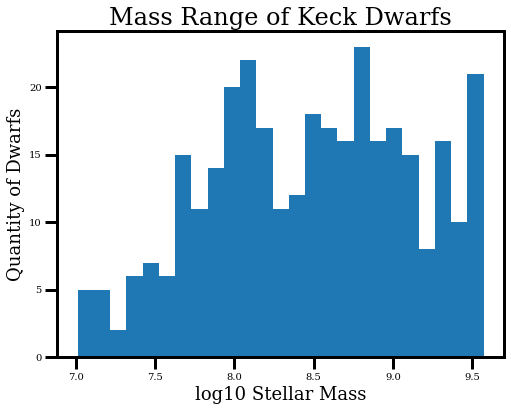

In [5]:
# Mass 
plt.figure(figsize=(8,6), facecolor='w')

plt.hist(mass_keck, bins=25)

plt.xlabel('log10 Stellar Mass', fontsize=18)
plt.ylabel('Quantity of Dwarfs', fontsize=18)
plt.title('Mass Range of Keck Dwarfs', fontsize=24)

In [6]:
max(z)

0.7214999999999986

Text(0.5, 1.0, 'Redshift Range of Keck Dwarfs')

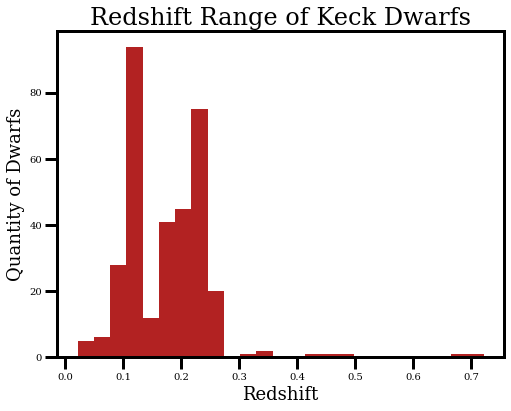

In [7]:
# redshift 
plt.figure(figsize=(8,6), facecolor='w')

plt.hist(z, bins=25, color='firebrick')

plt.xlabel('Redshift', fontsize=18)
plt.ylabel('Quantity of Dwarfs', fontsize=18)
plt.title('Redshift Range of Keck Dwarfs', fontsize=24)

Text(0.5, 1.0, 'Sigma Range of Keck Dwarfs')

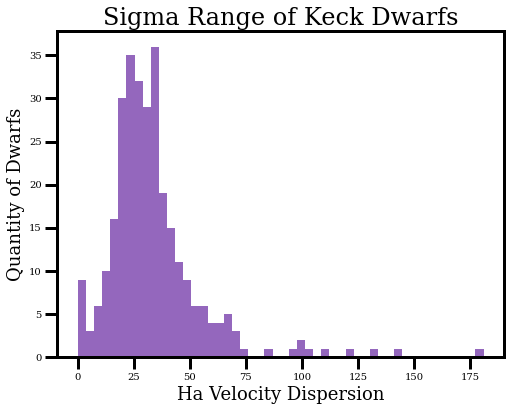

In [8]:
# vdisp 
plt.figure(figsize=(8,6), facecolor='w')

plt.hist(vdisp_keck[vdisp_keck<200], bins=50, color='tab:purple')

plt.xlabel('Ha Velocity Dispersion', fontsize=18)
plt.ylabel('Quantity of Dwarfs', fontsize=18)
plt.title('Sigma Range of Keck Dwarfs', fontsize=24)

Text(0.5, 1.0, 'sSFR Range of Keck Dwarfs')

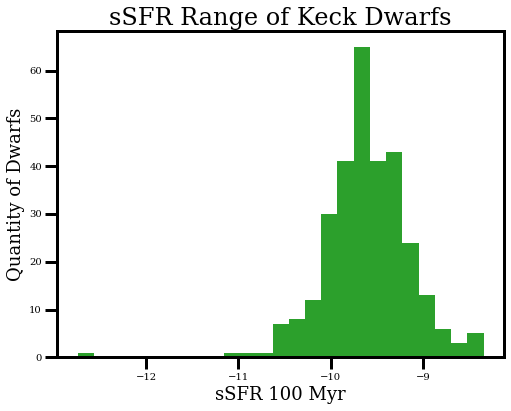

In [9]:
# ssfr
plt.figure(figsize=(8,6), facecolor='w')

plt.hist(ssfr_keck[ssfr_keck>-15], bins=25, color='tab:green')

plt.xlabel('sSFR 100 Myr', fontsize=18)
plt.ylabel('Quantity of Dwarfs', fontsize=18)
plt.title('sSFR Range of Keck Dwarfs', fontsize=24)

Text(0.5, 1.0, 'Halflight Radius Range of Keck Dwarfs')

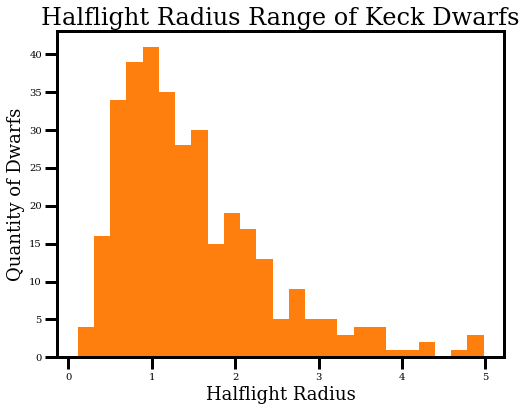

In [10]:
# radius
plt.figure(figsize=(8,6), facecolor='w')

plt.hist(hlr_keck, bins=25, color='tab:orange')

plt.xlabel('Halflight Radius', fontsize=18)
plt.ylabel('Quantity of Dwarfs', fontsize=18)
plt.title('Halflight Radius Range of Keck Dwarfs', fontsize=24)

## Scatter Plots

In [11]:
# make cuts for ssfr and sigma 
ssfr_min = -11
ssfr_max = -8

sigma_min = 0
sigma_max = 100

# cut on ssfr 
ssfrmask = ssfr_keck>=ssfr_min

z_cut = z[ssfrmask]
ssfr_keck_cut = ssfr_keck[ssfrmask]
vdisp_keck_cut = vdisp_keck[ssfrmask]
hlr_keck_cut = hlr_keck[ssfrmask]
mass_keck_cut = mass_keck[ssfrmask]

ssfrmask = ssfr_keck_cut<=ssfr_max

z_cut = z_cut[ssfrmask]
ssfr_keck_cut = ssfr_keck_cut[ssfrmask]
vdisp_keck_cut = vdisp_keck_cut[ssfrmask]
hlr_keck_cut = hlr_keck_cut[ssfrmask]
mass_keck_cut = mass_keck_cut[ssfrmask]

# cut on sigma 
sigmamask = vdisp_keck_cut>sigma_min

z_cut = z_cut[sigmamask]
ssfr_keck_cut = ssfr_keck_cut[sigmamask]
vdisp_keck_cut = vdisp_keck_cut[sigmamask]
hlr_keck_cut = hlr_keck_cut[sigmamask]
mass_keck_cut = mass_keck_cut[sigmamask]

sigmamask = vdisp_keck_cut<sigma_max

z_cut = z_cut[sigmamask]
ssfr_keck_cut = ssfr_keck_cut[sigmamask]
vdisp_keck_cut = vdisp_keck_cut[sigmamask]
hlr_keck_cut = hlr_keck_cut[sigmamask]
mass_keck_cut = mass_keck_cut[sigmamask]

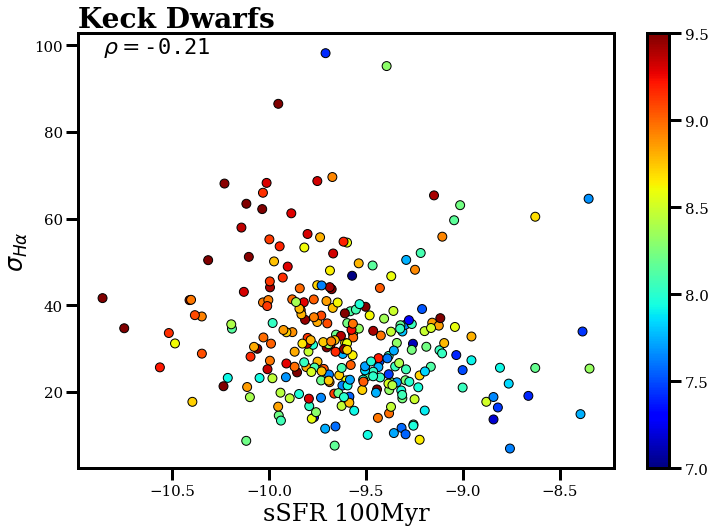

In [12]:
# ssfr100 and sigma
mstar_min = 2.0
mstar_max = 11.5

plt.figure(figsize=(12,8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

massmask = mass_keck_cut >= mstar_min
mm = mass_keck_cut[massmask]
x = ssfr_keck_cut[massmask]
y = vdisp_keck_cut[massmask]

massmask = mm<=mstar_max
mm = mm[massmask]
x = x[massmask]
y = y[massmask]

plt.scatter(x, y, c=mm, cmap='jet', s=80, ec='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.clim(7.0,9.5)

# spearman
p = ss.spearmanr(x, y)[0]
plt.text(s=r'$\rho=$'+str(p)[:5], x=min(x), y=max(y), fontfamily='monospace', fontsize=22)

plt.title('Keck Dwarfs', fontsize=28, weight='heavy', loc='left')
plt.xlabel('sSFR 100Myr', fontsize=24)
plt.ylabel(r'$\sigma_{H\alpha}$', fontsize=24)

pf = '../figures/keck/ssfr_100_sigmaHa_all.png'
plt.savefig(pf)

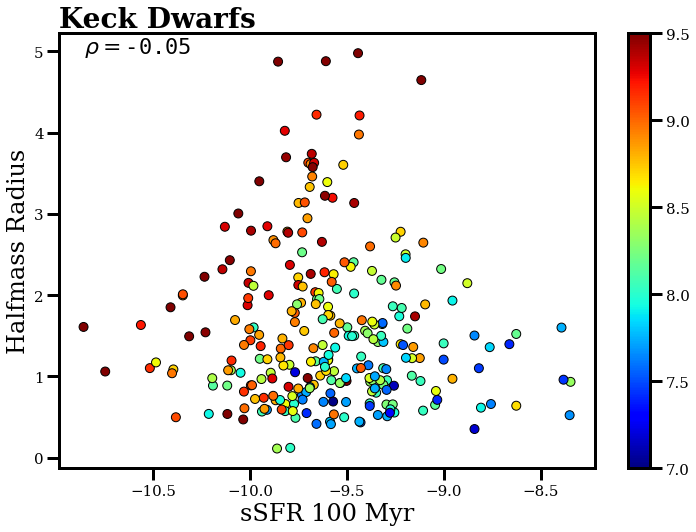

In [13]:
# ssfr100 and sigma
mstar_min = 6.0
mstar_max = 110

plt.figure(figsize=(12,8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

massmask = mass_keck_cut >= mstar_min
mm = mass_keck_cut[massmask]
x = ssfr_keck_cut[massmask]
y = hlr_keck_cut[massmask]

massmask = mm<=mstar_max
mm = mm[massmask]
x = x[massmask]
y = y[massmask]

plt.scatter(x, y, c=mm, cmap='jet', s=80, ec='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.clim(7.0,9.5)

# spearman
p = ss.spearmanr(x, y)[0]
plt.text(s=r'$\rho=$'+str(p)[:5], x=min(x), y=max(y), fontfamily='monospace', fontsize=22)

plt.title('Keck Dwarfs', fontsize=28, weight='heavy', loc='left')
plt.xlabel('sSFR 100 Myr', fontsize=24)
plt.ylabel('Halfmass Radius', fontsize=24)

pf = '../figures/keck/ssfr_100_hmr_all.png'
plt.savefig(pf)

## Mass Binned Figures

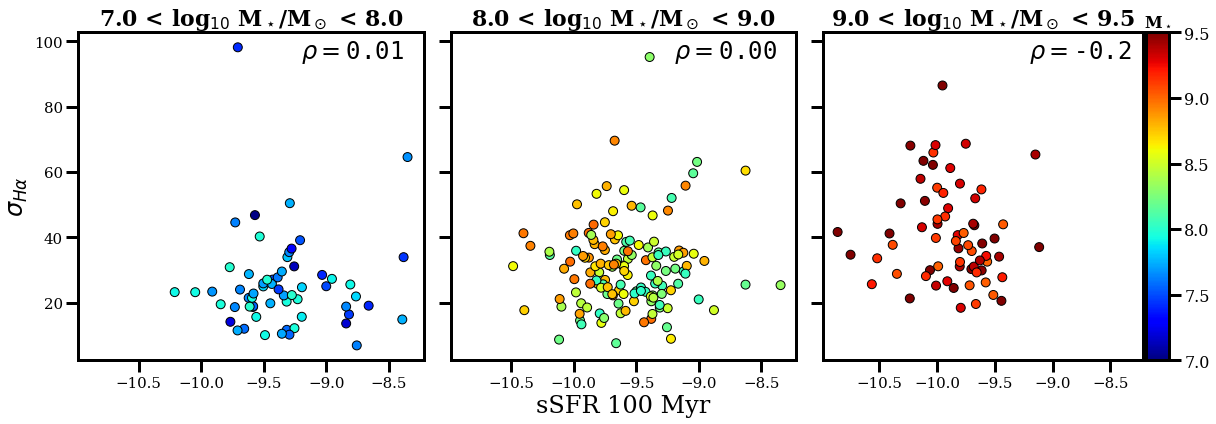

In [19]:
fig, axs = plt.subplots(1,3, figsize=(17,6), facecolor='w', sharex=True, sharey=True)

mbins = [7.0, 8.0, 9.0, 10.0]
for i,ax in enumerate(axs):
    mstar_min = mbins[i]
    mstar_max = mbins[i+1]

    massmask = mass_keck_cut >= mstar_min
    mm = mass_keck_cut[massmask]
    x = ssfr_keck_cut[massmask]
    y = vdisp_keck_cut[massmask]

    massmask = mm<=mstar_max
    mm = mm[massmask]
    x = x[massmask]
    y = y[massmask]

    s=ax.scatter(x, y, c=mm, cmap='jet', s=80, ec='k', vmin=7,vmax=9.5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=13)

    p = ss.spearmanr(x, y)[0]
    ax.text(s=r'$\rho = $'+str(p)[:4], x=-9.2, y=95, fontsize=24, fontfamily='monospace')
    
# colorbar
cax = make_axes_locatable(axs[2]).append_axes('right', size='7%', pad=0.05)
fig.colorbar(s, cax=cax, orientation='vertical')
cax.set_title(r'M$_\star$', fontsize=16, weight='bold')
cax.tick_params(axis='both', which='major', labelsize=16)
    
# prettify 
axs[1].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[0].set_ylabel(r'$\sigma_{H\alpha}$', fontsize=24)

axs[0].set_title('7.0 < log$_{10}$ M$_\star$/M$_\odot$ < 8.0', fontsize=22, weight='heavy')
axs[1].set_title('8.0 < log$_{10}$ M$_\star$/M$_\odot$ < 9.0', fontsize=22, weight='heavy')
axs[2].set_title('9.0 < log$_{10}$ M$_\star$/M$_\odot$ < 9.5', fontsize=22, weight='heavy')

plt.tight_layout()

pf = '../figures/keck/ssfr_100_sigmaHa_binned.png'
plt.savefig(pf)

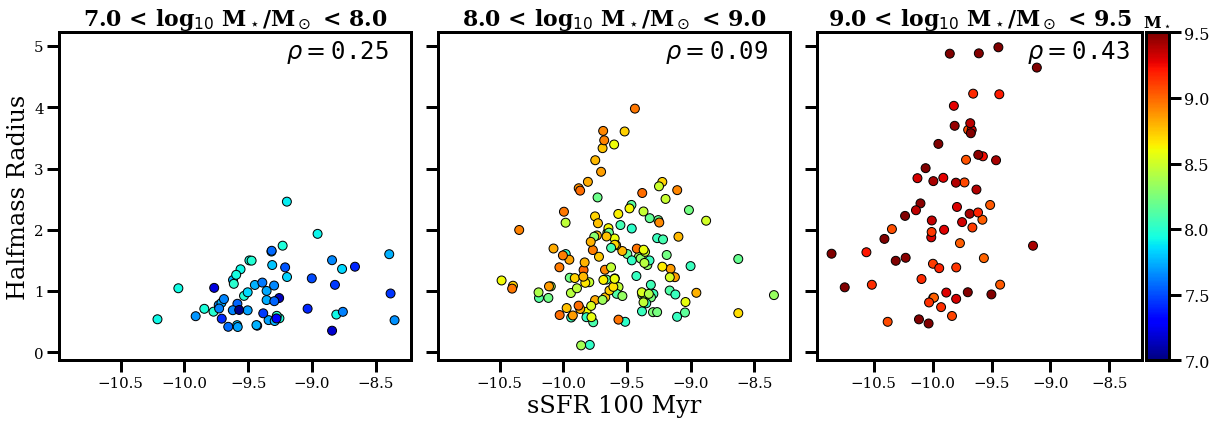

In [15]:
fig, axs = plt.subplots(1,3, figsize=(17,6), facecolor='w', sharex=True, sharey=True)

mbins = [7.0, 8.0, 9.0, 10.0]
for i,ax in enumerate(axs):
    mstar_min = mbins[i]
    mstar_max = mbins[i+1]

    massmask = mass_keck_cut >= mstar_min
    mm = mass_keck_cut[massmask]
    x = ssfr_keck_cut[massmask]
    y = hlr_keck_cut[massmask]

    massmask = mm<=mstar_max
    mm = mm[massmask]
    x = x[massmask]
    y = y[massmask]

    s=ax.scatter(x, y, c=mm, cmap='jet', s=80, ec='k', vmin=7,vmax=9.5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=13)

    p = ss.spearmanr(x, y)[0]
    ax.text(s=r'$\rho = $'+str(p)[:4], x=-9.2, y=4.8, fontsize=24, fontfamily='monospace')
    
# colorbar
cax = make_axes_locatable(axs[2]).append_axes('right', size='7%', pad=0.05)
fig.colorbar(s, cax=cax, orientation='vertical')
cax.set_title(r'M$_\star$', fontsize=16, weight='bold')
cax.tick_params(axis='both', which='major', labelsize=16)
    
# prettify 
axs[1].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[0].set_ylabel('Halfmass Radius', fontsize=24)

axs[0].set_title('7.0 < log$_{10}$ M$_\star$/M$_\odot$ < 8.0', fontsize=22, weight='heavy')
axs[1].set_title('8.0 < log$_{10}$ M$_\star$/M$_\odot$ < 9.0', fontsize=22, weight='heavy')
axs[2].set_title('9.0 < log$_{10}$ M$_\star$/M$_\odot$ < 9.5', fontsize=22, weight='heavy')

plt.tight_layout()

pf = '../figures/keck/ssfr_100_hmr_binned.png'
plt.savefig(pf)

##  What about finer mass bins?

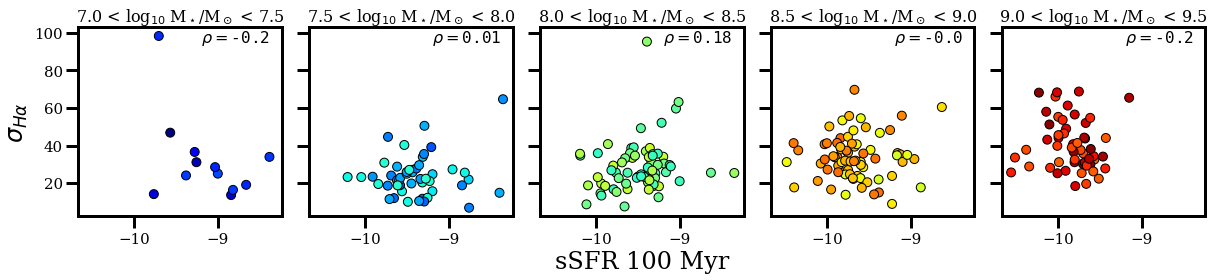

In [34]:
fig, axs = plt.subplots(1,5, figsize=(17,4), facecolor='w', sharex=True, sharey=True)

mbins = [7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
for i,ax in enumerate(axs):
    mstar_min = mbins[i]
    mstar_max = mbins[i+1]

    massmask = mass_keck_cut >= mstar_min
    mm = mass_keck_cut[massmask]
    x = ssfr_keck_cut[massmask]
    y = vdisp_keck_cut[massmask]

    massmask = mm<=mstar_max
    mm = mm[massmask]
    x = x[massmask]
    y = y[massmask]

    s=ax.scatter(x, y, c=mm, cmap='jet', s=80, ec='k', vmin=7,vmax=9.5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=13)

    p = ss.spearmanr(x, y)[0]
    ax.text(s=r'$\rho = $'+str(p)[:4], x=-9.2, y=95, fontsize=16, fontfamily='monospace')
    
# colorbar
#cax = make_axes_locatable(axs[-1]).append_axes('right', size='7%', pad=0.05)
#fig.colorbar(s, cax=cax, orientation='vertical')
#cax.set_title(r'M$_\star$', fontsize=16, weight='bold')
#cax.tick_params(axis='both', which='major', labelsize=16)
    
# prettify 
axs[2].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[0].set_ylabel(r'$\sigma_{H\alpha}$', fontsize=24)

fs = 16
axs[0].set_title('7.0 < log$_{10}$ M$_\star$/M$_\odot$ < 7.5', fontsize=fs)
axs[1].set_title('7.5 < log$_{10}$ M$_\star$/M$_\odot$ < 8.0', fontsize=fs)
axs[2].set_title('8.0 < log$_{10}$ M$_\star$/M$_\odot$ < 8.5', fontsize=fs)
axs[3].set_title('8.5 < log$_{10}$ M$_\star$/M$_\odot$ < 9.0', fontsize=fs)
axs[4].set_title('9.0 < log$_{10}$ M$_\star$/M$_\odot$ < 9.5', fontsize=fs)

plt.tight_layout()

pf = '../figures/keck/ssfr_100_sigmaHa_binned_5.png'
plt.savefig(pf)

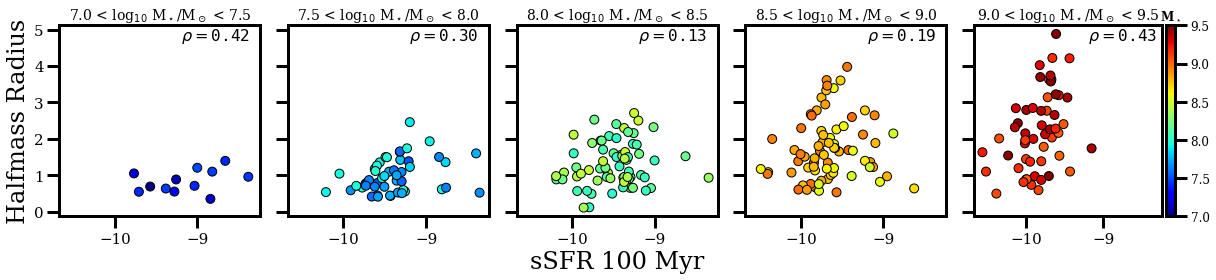

In [39]:
fig, axs = plt.subplots(1,5, figsize=(17,4), facecolor='w', sharex=True, sharey=True)

mbins = [7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
for i,ax in enumerate(axs):
    mstar_min = mbins[i]
    mstar_max = mbins[i+1]

    massmask = mass_keck_cut >= mstar_min
    mm = mass_keck_cut[massmask]
    x = ssfr_keck_cut[massmask]
    y = hlr_keck_cut[massmask]

    massmask = mm<=mstar_max
    mm = mm[massmask]
    x = x[massmask]
    y = y[massmask]

    s=ax.scatter(x, y, c=mm, cmap='jet', s=80, ec='k', vmin=7,vmax=9.5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=13)

    p = ss.spearmanr(x, y)[0]
    ax.text(s=r'$\rho = $'+str(p)[:4], x=-9.2, y=4.7, fontsize=16, fontfamily='monospace')
    
# colorbar
cax = make_axes_locatable(axs[-1]).append_axes('right', size='5%', pad=0.05)
fig.colorbar(s, cax=cax, orientation='vertical')
cax.set_title(r'M$_\star$', fontsize=12, weight='bold')
cax.tick_params(axis='both', which='major', labelsize=12)
    
# prettify 
axs[2].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[0].set_ylabel('Halfmass Radius', fontsize=24)

fs = 14
axs[0].set_title('7.0 < log$_{10}$ M$_\star$/M$_\odot$ < 7.5', fontsize=fs)
axs[1].set_title('7.5 < log$_{10}$ M$_\star$/M$_\odot$ < 8.0', fontsize=fs)
axs[2].set_title('8.0 < log$_{10}$ M$_\star$/M$_\odot$ < 8.5', fontsize=fs)
axs[3].set_title('8.5 < log$_{10}$ M$_\star$/M$_\odot$ < 9.0', fontsize=fs)
axs[4].set_title('9.0 < log$_{10}$ M$_\star$/M$_\odot$ < 9.5', fontsize=fs)

plt.tight_layout()

pf = '../figures/keck/ssfr_100_hmr_binned_5.png'
plt.savefig(pf)